# Tiles, murals and numbers

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.patches import Polygon
import math
from copy import copy

## Basic definitions

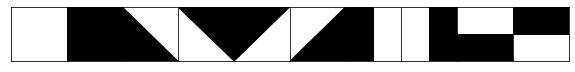

In [2]:
def get_0():
    return Polygon([(0,0)], color="k")

def get_1():
    return Polygon([(0,0), (0,1), (1,1), (1,0)], color="k")

def get_2():
    return Polygon([(0,0), (0,1), (1,0)], color="k")

def get_3():
    return Polygon([(1,0), (1,1), (0,1)], color="k")

def get_4():
    return Polygon([(0,0), (1,1), (0,1)], color="k")

def get_5():
    return Polygon([(0,0), (1,1), (1,0)], color="k")

def get_6():
    return Polygon([(0,0), (0.5,0), (0.5,1), (0,1)], color="k")

def get_7():
    return Polygon([(0.5,0),(1,0), (1,1), (0.5,1)], color="k")

def get_8():
    return Polygon([(0,0), (0,0.5), (1,0.5),(1,0)], color="k")

def get_9():
    return Polygon([(0,0.5),(1,0.5), (1,1), (0,1)], color="k")


def num2tile(num):
    if num==0:
        return get_0()
    elif num == 1:
        return get_1()
    elif num == 2:
        return get_2()
    elif num == 3:
        return get_3()
    elif num == 4:
        return get_4()
    elif num == 5:
        return get_5()
    elif num == 6:
        return get_6()
    elif num == 7:
        return get_7()
    elif num == 8:
        return get_8()
    elif num == 9:
        return get_9()
    
    
v = [0,1,2,3,4,5,6,7,8,9]
fig, _ = plt.subplots(1,10, figsize=(10,1))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])


## Example of murals

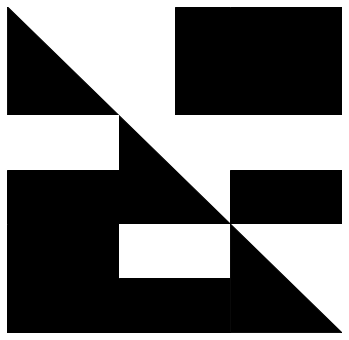

In [3]:
def float2vector(float_):
    float_str = "{:.10f}".format(float_)
    return [int(x) for x in "".join(re.findall('[0-9]+', float_str))]

v = float2vector(math.e)
fig, _ = plt.subplots(3,3, figsize=(6,6))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

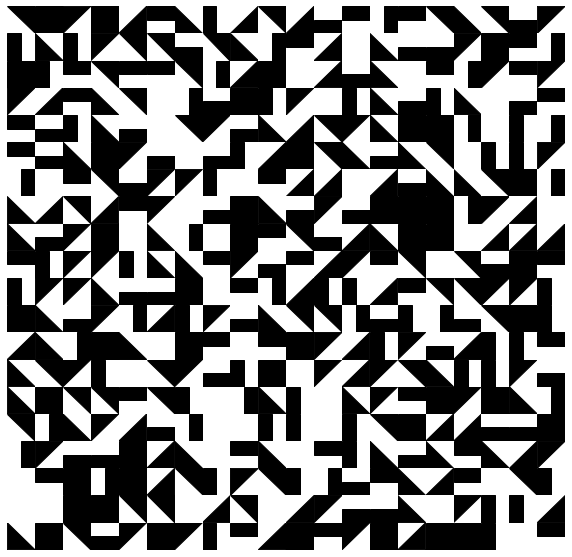

In [4]:
pi_400 = "31415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094"
v = [int(x) for x in "".join(pi_400)]

fig, _ = plt.subplots(20,20, figsize=(10,10))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

## Rotation and convolution

In [5]:
rotate_cw = {0:0, 1:1,
             2:4, 3:5,
             4:3, 5:2,
             6:8, 7:9,
             8:7, 9:6}

rotate_ccw = {0:0, 1:1,
              2:5, 3:4,
              4:2, 5:3,
              6:9, 7:8,
              8:6, 9:9}



def convolution(input_v):
    v = copy(input_v)
    size = len(v)
    for i,_ in enumerate(v):
        if i > 0 and v[i] > 0:
            if v[i-1]%v[i] == 0:
                v[i-1] = rotate_cw[v[i-1]]
            else:
                v[i-1] = rotate_ccw[v[i-1]]
        if i < size-1 and v[i] > 0:
            if v[i+1]%v[i] == 0:
                v[i+1] = rotate_cw[v[i+1]]
            else:
                v[i+1] = rotate_ccw[v[i+1]]
    return v


### Example

7123 representation:



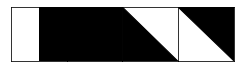

In [6]:
print("7123 representation:\n")
v = [7,1,2,3]
fig, _ = plt.subplots(1,4, figsize=(4,1))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])


convolution(7123)= 9134 representation:



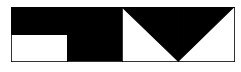

In [7]:
print("convolution(7123)= 9134 representation:\n")
v = convolution(v)
fig, _ = plt.subplots(1,4, figsize=(4,1))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])

## Convolution as a function between natural numbers

In [8]:
def int2list(n):
    return [int(i) for i in str(n)]
    

def list2int(v):
    v_str = [str(i) for i in v]
    return int("".join(v_str))

def conv(n):
    return list2int(convolution(int2list(n)))

def get_f(k):
    f = lambda x: conv(x) + k
    return f 

f_0 = get_f(0)
f_0_v = np.vectorize(f_0)

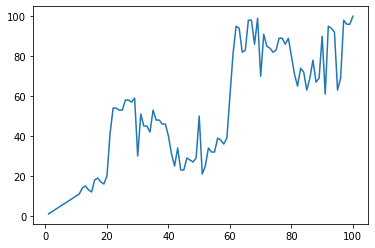

In [9]:
x = np.array(range(1, 100+1))
y = f_0_v(x)
plt.plot(x,y);

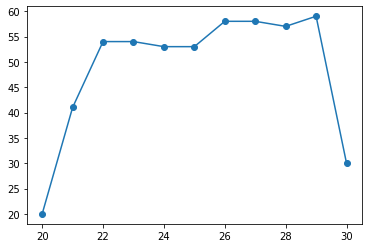

In [10]:
x = np.array(range(20, 30+1))
y = f_0_v(x)
plt.plot(x,y, marker="o");

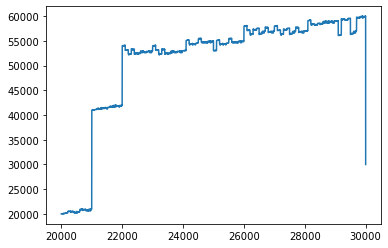

In [11]:
x = np.array(range(20000, 30000+1))
y = f_0_v(x)
plt.plot(x,y);

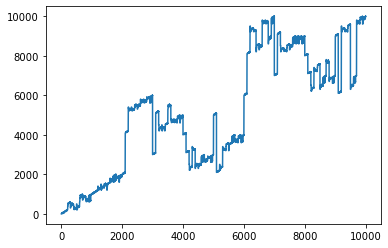

In [12]:
x = np.array(range(1, 10000+1))
y = f_0_v(x)
plt.plot(x,y);

## Convolution as a function between real numbers

In [13]:
def c_float(float_):
    p_pos = str(float_).find(".")
    float_str = "{:.10f}".format(float_)
    v = [int(x) for x in "".join(re.findall('[0-9]+', float_str))]
    new_v = convolution(v)
    s = ""
    for i,n in enumerate(new_v):
        if i== p_pos:
            s+= "." + str(n)
        else:
            s += str(n)
    return float(s)
c_f = np.vectorize(c_float)

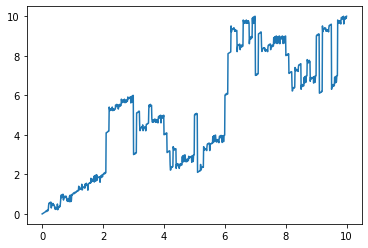

In [14]:
x = np.linspace(0,10,1000)
y = c_f(x)
plt.plot(x,y);

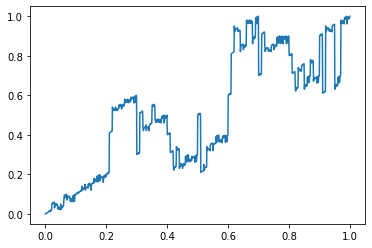

In [15]:
x = np.linspace(0,1,1000)
y = c_f(x)
plt.plot(x,y);

## Fixed points

In [16]:
def get_cicle(f, init, patience=10000):
    count = 0 
    results = [init]
    while True and count < patience:
        value = results[-1]
        new = f(value)
        if new not in results:
            results.append(new)
        else:
            results.append(new)
            break
        count +=1
    return np.array(results)

# f_1 = get_f(1)
# results = get_cicle(f_1, 1)
# results

# x = range(1, 10000 + 1)
# y = [len(get_cicle(f_0, i)) for i in x]
# plt.plot(x,y);